# Assignment 1: k-nearest neighbors

Only use the already imported libraries `numpy` and `matplotlib.pyplot` for the assignment. Do not import any other library. 

In [ ]:
# Load required packages and dataset. Do not modify.
import matplotlib.pyplot as plt
import numpy as np


def load_iris_dataset():
    from sklearn import datasets
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    return X, y
    
X, y = load_iris_dataset()


## Task 1: Visualization and Preprocessing

1) Explain the content of the dataset in few words. What are the input features? What is the classification target? Check out: [https://en.wikipedia.org/wiki/Iris_flower_data_set](https://en.wikipedia.org/wiki/Iris_flower_data_set).


features are:
 length and the width of the sepals and petals.
 <br>
target is classification of the species.

2) Compute and print the following statistics about the dataset:
  - Number of samples
  - Number of samples per class
  - Mean and standard deviation for each input feature


In [69]:
num,feature = X.shape
print("number of samples:", num)

className, classNumber = np.unique(y, return_counts=True)
for i in range(3):
    print("class",className[i], "has",classNumber[i])
    
for i in range(4):
    print("mean of feaure",i,"is",np.mean(X[i]))
    print("standard deviation of feaure",i,"is",np.std(X[i]))


number of samples: 150
class 0 has 50
class 1 has 50
class 2 has 50
mean of feaure 0 is 2.55
standard deviation of feaure 0 is 1.8874586088176872
mean of feaure 1 is 2.375
standard deviation of feaure 1 is 1.7640507362318127
mean of feaure 2 is 2.35
standard deviation of feaure 2 is 1.7298843892006195
mean of feaure 3 is 2.3499999999999996
standard deviation of feaure 3 is 1.6560495161679194


3) Visualize the variables Sepal length and Petal length in a scatter plot (Sepal length on the x-axis, petal length on the y-axis). Color each point of the plot according to its class.

Text(0, 0.5, 'petal length (cm)')

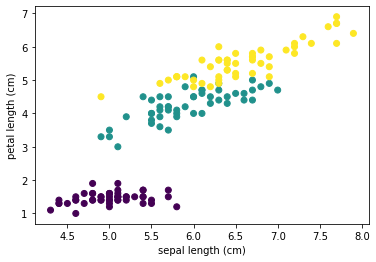

In [307]:
plt.scatter(X[:, 0], X[:, 2], c=y)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

4) Split the dataset randomly into training and test data. 70% of data should be used for training and 30% should be used for testing. Implement the function `train_test_split`. Do not modify the interface of the function.

In [140]:
def train_test_split(X, y):
    """
    Returns X_train, X_test, y_train, y_test, 
        where X_train and X_test are the input features of the training and test set,
        and y_train and y_test are the class labels of the training and test set.
    """
    # Implement your solution here.
    import random
    train = random.sample(range(num), round(num*0.7))   # generate 70% of random training indexes from total indexes
    test =  np.array(list(set(range(num))-set(train))) # generate test indexes from rest of indexes

    X_train = X[train]
    X_test = X[test]
    y_train = y[train]
    y_test = y[test]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y)

assert (X_train.shape[0] + X_test.shape[0]) == X.shape[0]
assert (y_train.shape[0] + y_test.shape[0]) == y.shape[0]
assert X_train.shape[1] == X_test.shape[1]


5) kNN uses a distance measure to identify close neighbors. If the input features are not of the same scale, the distance is not as meaningful, which can negatively impact classification performance. Perform min-max scaling (i.e. scale the values of the input features in such a way that their range is from 0 to 1) on the training and test data. Remember that you should only use information from the training data to perform the scaling on both data sets.

In [148]:
X_train = (X_train-np.min(X_train))/np.max(X_train)
X_test = (X_test-np.min(X_train))/np.max(X_train)

## Task 2: k-nearest neighbors

**For B.Sc. Data Science:**  
Implement the kNN algorithm with uniform weighting and arbitrary `k`. Fill out the `predict` method of class `KNearestNeighborsClassifier`. 

Use Euclidean distance to determine the nearest neighbors.
You can ignore the optional parameter `distance_metric`, which is provided as a field in the kNN class.

**For everyone else:**  
Implement the kNN algorithm with distance-based weighting and arbitrary `k`.
Fill out the `predict` method of class `KNearestNeighborsClassifier`.

The parameter `distance_metric` will either contain the string `uniform` or a function. If the value is `uniform`, the classifier should use the Euclidean distance for determining nearest neighbors and uniform weighting. If the value is a function, the classifier should use the function as distance metric and perform distance-weighted classification. An example distance metric is provided with `euclidean_distance`.

In [301]:
class KNearestNeighbors(object):
    def __init__(self, k, distance_metric='uniform'):
        self.k = k
        self.distance_metric = distance_metric
        
    def fit(self, X, y):
        """
        This functions saves the training data to be used during the prediction.
        """
        self.X = X
        self.y = y
    
    def predict(self, X):
        """
        Returns a vector of shape (n,) if X has shape (n,d), 
        where n is the number of samples and d is the number of features.
        """
        # Implement your solution here.
        X_pred = X
        distance = np.ones([len(X_pred),len(X_train)])
        y_pred = np.ones([len(X_train),1])
        for i in range(len(X_pred)):
            for j in range(len(X_train)):
                distance[i,j] = euclidean_distance(X_train[j],X_pred[i])
            sort = np.argsort(distance[i,:])    # returns indexes from the smallest to largest distance
            topk = [self.y[i] for i in sort[:self.k]]
            name, times = np.unique(s, return_counts=True)
            y_pred[i] = name[np.argsort(times)[len(times)-1]]

        return y_pred


    
def euclidean_distance(x1, x2):
    """
    Given vectors x1 and x2 with shape (n,) returns distance between vectors as float.
    """
    return np.sqrt(np.sum((x1 - x2)*(x1 - x2)))

## Task 3: Evaluation

1) Implement functions to compute precision, recall and F1-score. `y_pred` and `y_true` are the vectors of predicted and true class labels respectively with shape `(n,)`, where `n` is the number of samples. Each function should return a float containing the corresponding score.

In [280]:
def precision(y_pred, y_true):
    # Implement your solution here.
    precision = np.zeros(3)
    for i in range(2):
        correct_sum[i] = np.sum(y_pred==i & y_true==i)
        total_sum[i] = np.sum(y_pred==i)
        if(total_sum[i]==0):
            precision[i] = 0
        precision[i] = round(float(correct_sum[i])/float(total_sum[i]),2)
    return precision

def recall(y_pred, y_true):
    # Implement your solution here.
    recall = np.zeros(3)
    for i in range(2):
        correct_sum[i] = np.sum(y_pred==i & y_true==i)
        total_sum[i] = np.sum(y_true==i)
        if(total_sum[i]==0):
            recall[i] = 0        
        recall[i] = round(float(correct_sum[i])/float(total_sum[i]),2)
    return recall

def f1score(y_pred, y_true):
    # Implement your solution here.
    f1score = np.zeros(3)
    precision(y_pred, y_true)
    recall(y_pred, y_true)
    for i in range(2):
        if (precision[i] + recll[i] == 0):
            f1score[i] = 0
        f1score[i] = round(2*precision[i]*recall[i]/(precision[i]+recall[i]),2)
    return f1score

2) Evaluate the performance of kNN with uniform weighting on the Iris dataset for `k=1,3,5`. Train each of the `3` classifiers on the training data from Task 1. Perform the predictions on both the training and test data. Then compute precision, recall, and F1-score for each model and for both training and test data. Print all scores per model. What do you observe?

**For all students other than B.Sc. Data Science:** 
Evaluate the kNN classifier with Euclidean distance-weighting. Compare the performance to uniform-weighting. How does the performance change compared to uniform weighting for each `k`?

In [ ]:
# Implement your solution here.

==> *Write your observations here and report your results.* (double klick here to edit)

3) Explain why kNN with `k=1` achieves perfect results on the training data. Why is it not the best model?

Because it tends to cause overfitting, it has very high sensitivity regarding outliers